<a href="https://colab.research.google.com/github/mahima0811gupta/NLP-PYTHON/blob/main/twittersentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import warnings
%matplotlib inline
! pip install scikit-learn

warnings.filterwarnings('ignore')


In [165]:
train_df = pd.read_csv("twitter_training.csv")
test_df = pd.read_csv("twitter_validation.csv")

In [166]:
train_df.columns = ['ID', 'Name','Label', 'Content']
test_df.columns = ['ID', 'Name','Label', 'Content']

In [167]:
train_df.info()
print("\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       74681 non-null  int64 
 1   Name     74681 non-null  object
 2   Label    74681 non-null  object
 3   Content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       999 non-null    int64 
 1   Name     999 non-null    object
 2   Label    999 non-null    object
 3   Content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [168]:
train_df.head()

ID         Name     Label  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...

In [8]:
del train_df['Name']
del train_df['ID']
del test_df['Name']
del test_df['ID']
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [9]:
train_df.head()

Label                                            Content
0  Positive  I am coming to the borders and I will kill you...
1  Positive  im getting on borderlands and i will kill you ...
2  Positive  im coming on borderlands and i will murder you...
3  Positive  im getting on borderlands 2 and i will murder ...
4  Positive  im getting into borderlands and i can murder y...

In [10]:
test_df.head()

Label                                            Content
0   Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1  Negative  @Microsoft Why do I pay for WORD when it funct...
2  Negative  CSGO matchmaking is so full of closet hacking,...
3   Neutral  Now the President is slapping Americans in the...
4  Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...

In [169]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       74681 non-null  int64 
 1   Name     74681 non-null  object
 2   Label    74681 non-null  object
 3   Content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       999 non-null    int64 
 1   Name     999 non-null    object
 2   Label    999 non-null    object
 3   Content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [170]:
train_df = train_df[train_df['Label'] != 'Irrelevant']
test_df = test_df[test_df['Label'] != 'Irrelevant']

In [171]:
count_train = train_df['Label'].value_counts()
count_test = test_df['Label'].value_counts()
print(count_train, count_test)

Label
Negative    22542
Positive    20831
Neutral     18318
Name: count, dtype: int64 Label
Neutral     285
Positive    277
Negative    266
Name: count, dtype: int64


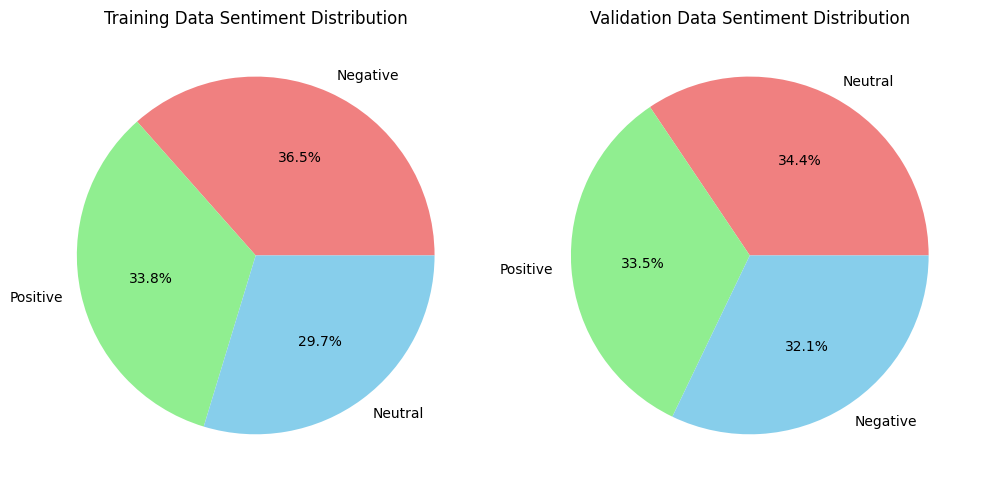

In [172]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(count_train, labels=count_train.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'skyblue'])
plt.title('Training Data Sentiment Distribution')

plt.subplot(1, 2, 2)
plt.pie(count_test, labels=count_test.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'skyblue'])
plt.title('Validation Data Sentiment Distribution')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

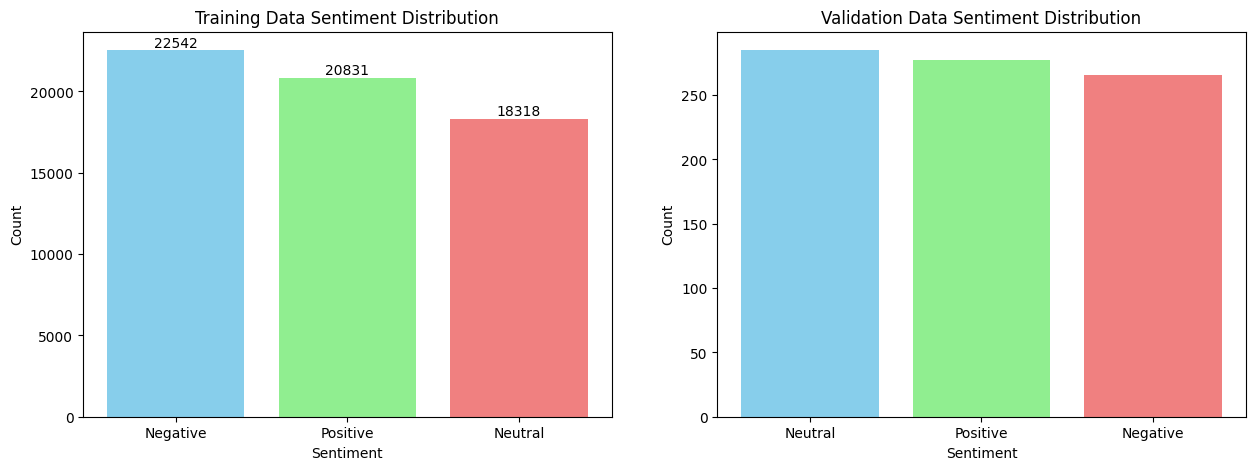

In [173]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(count_train.index, count_train.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

for i, count in enumerate(count_train.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')


plt.subplot(1, 2, 2)
plt.bar(count_test.index, count_test.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

In [174]:
train_sentences = train_df["Content"].to_numpy()
test_sentences = test_df["Content"].to_numpy()

label_mapping = {
    "Positive": 1,
    "Negative": -1,
    "Neutral": 0,
}
train_df["Label"] = train_df["Label"].replace(label_mapping)
test_df["Label"] = test_df["Label"].replace(label_mapping)

In [177]:
del train_df['Name']
del train_df['ID']
del test_df['Name']
del test_df['ID']
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [178]:
train_df.head()


Label                                            Content
0      1  I am coming to the borders and I will kill you...
1      1  im getting on borderlands and i will kill you ...
2      1  im coming on borderlands and i will murder you...
3      1  im getting on borderlands 2 and i will murder ...
4      1  im getting into borderlands and i can murder y...

In [179]:
test_df.head()

Label                                            Content
0      0  BBC News - Amazon boss Jeff Bezos rejects clai...
1     -1  @Microsoft Why do I pay for WORD when it funct...
2     -1  CSGO matchmaking is so full of closet hacking,...
3      0  Now the President is slapping Americans in the...
4     -1  Hi @EAHelp I’ve had Madeleine McCann in my cel...

In [180]:
print(train_sentences)
train_label

['I am coming to the borders and I will kill you all,'
 'im getting on borderlands and i will kill you all,'
 'im coming on borderlands and i will murder you all,' ...
 'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice'
 'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice'
 'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice']


0        1
1        1
2        1
3        1
4        1
        ..
53821   -1
53822   -1
53823   -1
53824   -1
53825   -1
Name: Label, Length: 43475, dtype: int64

In [181]:
print(test_sentences[:10])
test_label

["BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…"
 '@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄'
 "CSGO matchmaking is so full of closet hacking, it's a truly awful game."
 'Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discover on Google vanityfair.com/news/2020/02/t…'
 'Hi @EAHelp I’ve had Madeleine McCann in my cellar for the past 13 years and the little sneaky thing just escaped whilst I was loading up some fifa points, she took my card and I’m having to use my paypal account but it isn’t working, can you help me resolve it please?'
 'Thank you @EAMaddenNFL!! \n\nNew TE Austin Hooper in the ORANGE & BROWN!! \n\n#Browns | @AustinHooper18 \n\n pic.twitter.com/GRg4xzFKOn'
 'Rocket League, Sea of Thieves or Rainbow Six: Siege🤔? I love playing all three on stream but which is the best? #stream #twitch #R

0      0
1     -1
2     -1
3      0
4     -1
      ..
992   -1
993    1
996    1
997    1
998    0
Name: Label, Length: 828, dtype: int64

In [188]:

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [183]:
train_df.head()

Label                                            Content
0      1  I am coming to the borders and I will kill you...
1      1  im getting on borderlands and i will kill you ...
2      1  im coming on borderlands and i will murder you...
3      1  im getting on borderlands 2 and i will murder ...
4      1  im getting into borderlands and i can murder y...

In [187]:
test_df.head()

Label                                            Content
0      0  BBC News - Amazon boss Jeff Bezos rejects clai...
1     -1  @Microsoft Why do I pay for WORD when it funct...
2     -1  CSGO matchmaking is so full of closet hacking,...
3      0  Now the President is slapping Americans in the...
4     -1  Hi @EAHelp I’ve had Madeleine McCann in my cel...

In [189]:
train_df['clean_tweet'] = np.vectorize(remove_pattern)(train_df['Content'], "http\S+")
test_df['clean_tweet'] = np.vectorize(remove_pattern)(test_df['Content'], "http\S+")



In [190]:
test_df['clean_tweet'] = test_df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
test_df['clean_tweet'] = test_df['clean_tweet'].str.replace("@[A-Za-z0-9_]+|#[A-Za-z0-9_]+", " ")
test_df.head()


Label                                            Content  \
0      0  BBC News - Amazon boss Jeff Bezos rejects clai...   
1     -1  @Microsoft Why do I pay for WORD when it funct...   
2     -1  CSGO matchmaking is so full of closet hacking,...   
3      0  Now the President is slapping Americans in the...   
4     -1  Hi @EAHelp I’ve had Madeleine McCann in my cel...   

                                         clean_tweet  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2  CSGO matchmaking is so full of closet hacking,...  
3  Now the President is slapping Americans in the...  
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...

In [194]:

train_df['clean_tweet'] = train_df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
train_df['clean_tweet'] = train_df['clean_tweet'].str.replace("@[A-Za-z0-9_]+|#[A-Za-z0-9_]+", " ")
train_df.head()


Label                                            Content  \
0      1  I am coming to the borders and I will kill you...   
1      1  im getting on borderlands and i will kill you ...   
2      1  im coming on borderlands and i will murder you...   
3      1  im getting on borderlands 2 and i will murder ...   
4      1  im getting into borderlands and i can murder y...   

                                         clean_tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...

In [195]:


train_df['clean_tweet'] = np.vectorize(remove_pattern)(train_df['Content'], "@")
test_df['clean_tweet'] = np.vectorize(remove_pattern)(test_df['Content'], "@")



In [196]:
train_df.head()

Label                                            Content  \
0      1  I am coming to the borders and I will kill you...   
1      1  im getting on borderlands and i will kill you ...   
2      1  im coming on borderlands and i will murder you...   
3      1  im getting on borderlands 2 and i will murder ...   
4      1  im getting into borderlands and i can murder y...   

                                         clean_tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...

In [197]:
test_df.head()

Label                                            Content  \
0      0  BBC News - Amazon boss Jeff Bezos rejects clai...   
1     -1  @Microsoft Why do I pay for WORD when it funct...   
2     -1  CSGO matchmaking is so full of closet hacking,...   
3      0  Now the President is slapping Americans in the...   
4     -1  Hi @EAHelp I’ve had Madeleine McCann in my cel...   

                                         clean_tweet  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  Microsoft Why do I pay for WORD when it functi...  
2  CSGO matchmaking is so full of closet hacking,...  
3  Now the President is slapping Americans in the...  
4  Hi EAHelp I’ve had Madeleine McCann in my cell...

In [198]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
train_df.head()

Label                                            Content  \
0      1  I am coming to the borders and I will kill you...   
1      1  im getting on borderlands and i will kill you ...   
2      1  im coming on borderlands and i will murder you...   
3      1  im getting on borderlands 2 and i will murder ...   
4      1  im getting into borderlands and i can murder y...   

                            clean_tweet  
0         coming borders will kill all,  
1    getting borderlands will kill all,  
2   coming borderlands will murder all,  
3  getting borderlands will murder all,  
4  getting into borderlands murder all,

In [199]:

tokenized_tweet = train_df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0           [coming, borders, will, kill, all,]
1      [getting, borderlands, will, kill, all,]
2     [coming, borderlands, will, murder, all,]
3    [getting, borderlands, will, murder, all,]
4    [getting, into, borderlands, murder, all,]
Name: clean_tweet, dtype: object

In [201]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0          [come, border, will, kill, all,]
1       [get, borderland, will, kill, all,]
2    [come, borderland, will, murder, all,]
3     [get, borderland, will, murder, all,]
4     [get, into, borderland, murder, all,]
Name: clean_tweet, dtype: object

In [203]:
tokenized_tweet = test_df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [BBC, News, -, Amazon, boss, Jeff, Bezos, reje...
1    [Microsoft, Why, do, I, pay, for, WORD, when, ...
2    [CSGO, matchmaking, is, so, full, of, closet, ...
3    [Now, the, President, is, slapping, Americans,...
4    [Hi, EAHelp, I’ve, had, Madeleine, McCann, in,...
Name: clean_tweet, dtype: object

In [204]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [bbc, new, -, amazon, boss, jeff, bezo, reject...
1    [microsoft, whi, do, i, pay, for, word, when, ...
2    [csgo, matchmak, is, so, full, of, closet, hac...
3    [now, the, presid, is, slap, american, in, the...
4    [hi, eahelp, i’v, had, madelein, mccann, in, m...
Name: clean_tweet, dtype: object

Exploratory Data Analysis

In [206]:
!pip install wordcloud

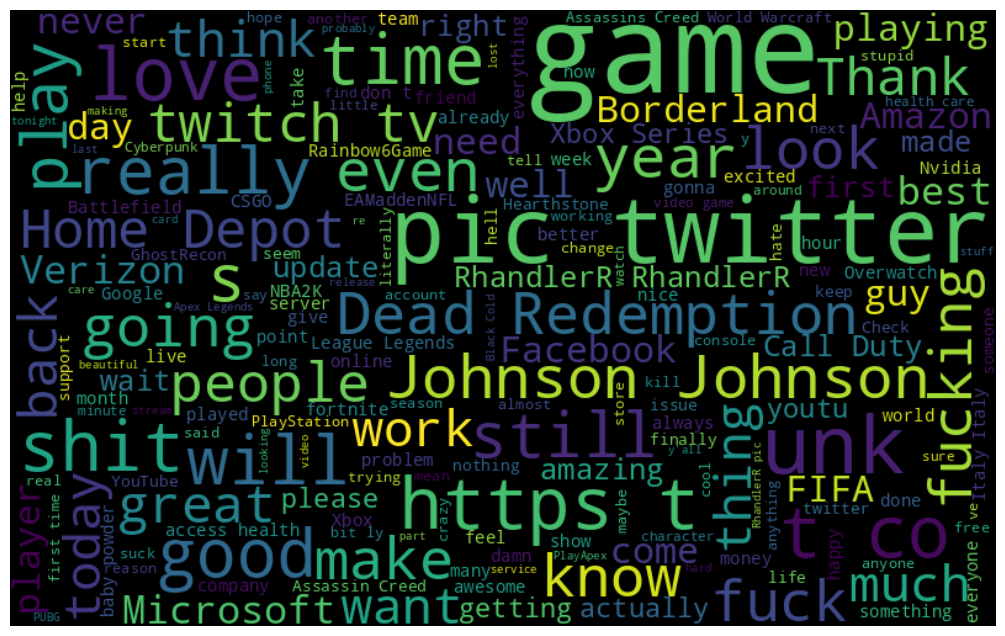

In [216]:

all_words = " ".join([sentence for sentence in train_df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

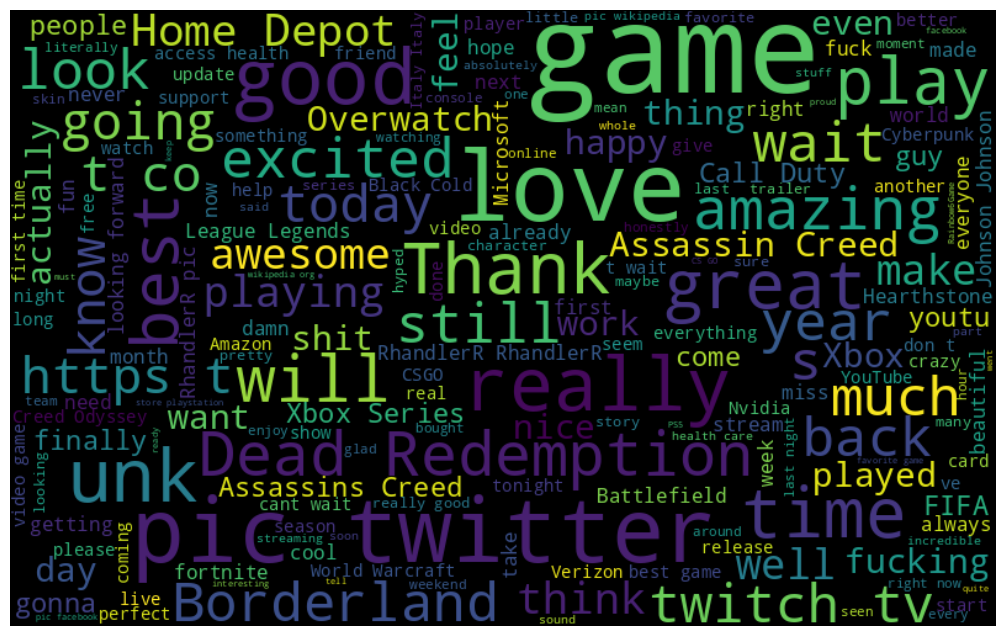

In [210]:
# frequent words visualization for +ve  for train_df
all_words = " ".join([sentence for sentence in train_df['clean_tweet'][train_df['Label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

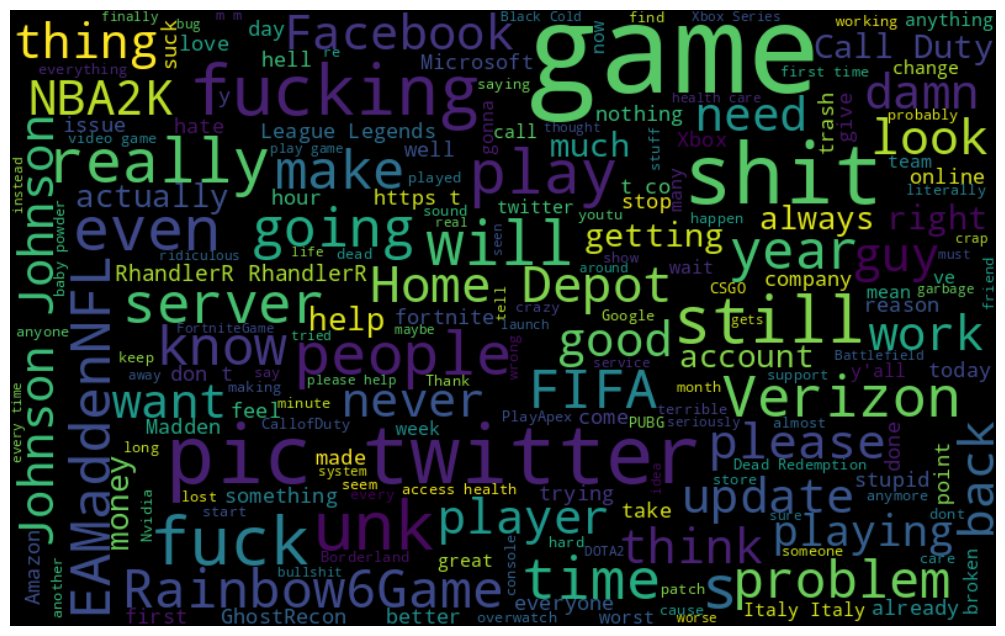

In [211]:
# frequent words visualization for +ve  for train_df
all_words = " ".join([sentence for sentence in train_df['clean_tweet'][train_df['Label']==-1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

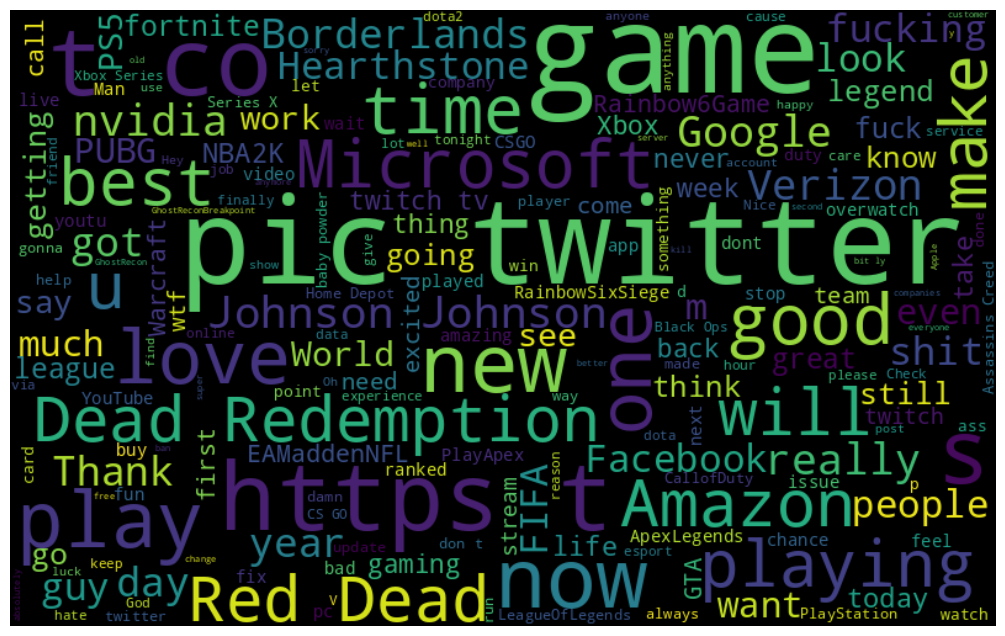

In [208]:

all_words = " ".join([sentence for sentence in test_df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

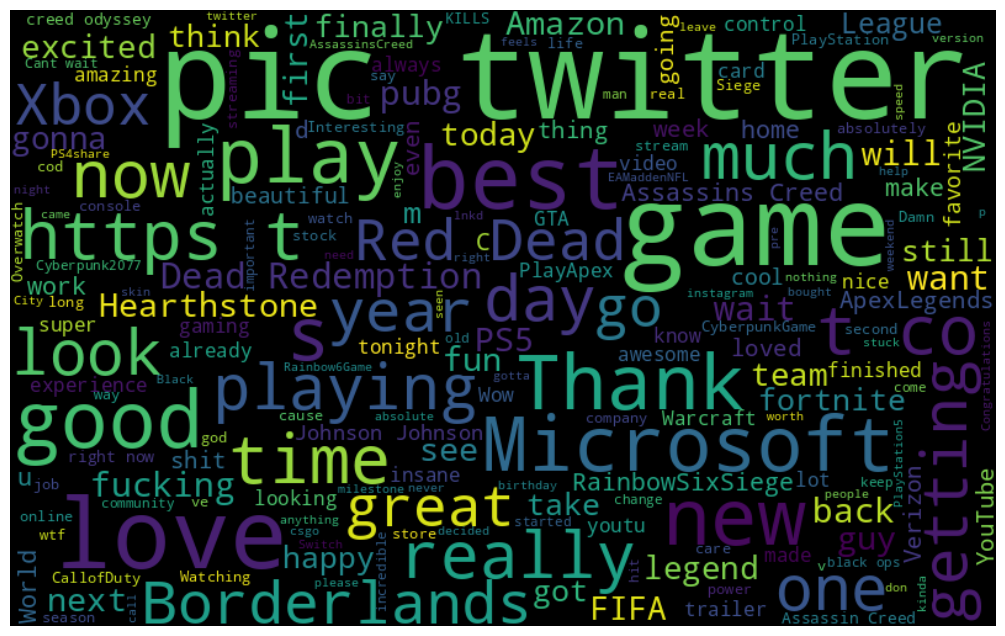

In [213]:
# frequent words visualization for +ve  for test_df
all_words = " ".join([sentence for sentence in test_df['clean_tweet'][test_df['Label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

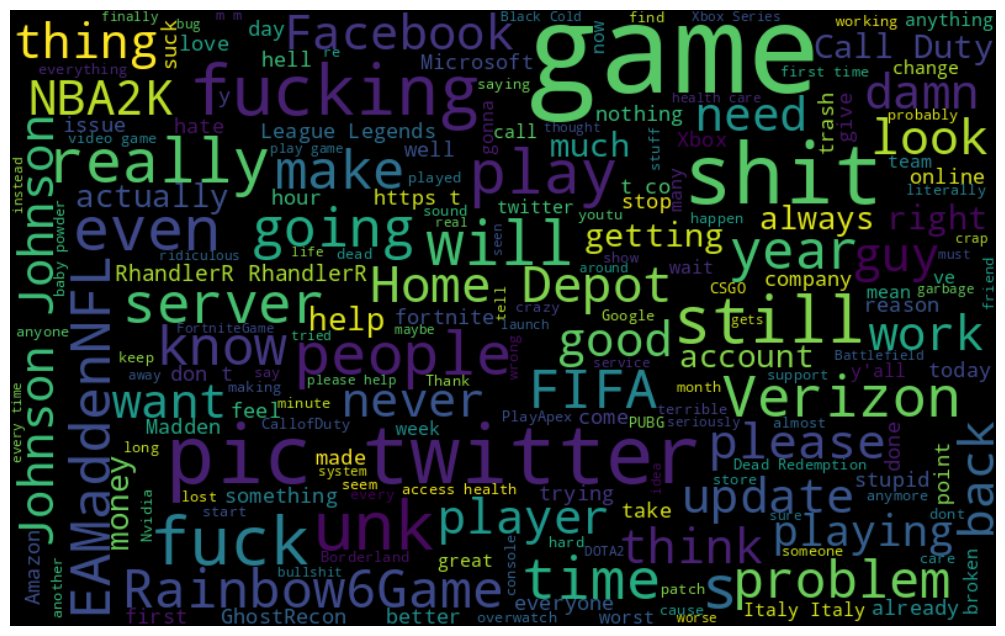

In [215]:
# frequent words visualization for +ve  for test_df
all_words = " ".join([sentence for sentence in train_df['clean_tweet'][train_df['Label']==-1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [217]:

def hashtag_extract(tweets):
    hashtags = []

    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [218]:

ht_positive1= hashtag_extract(train_df['clean_tweet'][train_df['Label']==0])
ht_positive2 = hashtag_extract(test_df['clean_tweet'][test_df['Label']==0])

ht_negative1 = hashtag_extract(train_df['clean_tweet'][train_df['Label']==1])
ht_negative2 = hashtag_extract(test_df['clean_tweet'][test_df['Label']==1])

In [219]:
ht_positive1[:5]
ht_positive2[:5]

[[], [], [], [], []]

In [220]:

ht_positive1 = sum(ht_positive1, [])
ht_negative1 = sum(ht_negative1, [])
ht_positive2 = sum(ht_positive2, [])
ht_negative2= sum(ht_negative2, [])


In [221]:
ht_positive1[:5]
ht_positive2[:5]

['gtc20',
 'PS4live',
 'Rainbowsixsiege',
 'Playstation',
 'CallOfDutyBlackOpsColdWar']

INPUT SPLIT

In [224]:

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train_df['clean_tweet'])
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(test_df['clean_tweet'])

In [225]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [244]:

!pip install cleantext

In [248]:
from cleantext import clean

In [249]:
!pip install demoji
import demoji


In [250]:
remove_emoji_train_sentences = []
remove_emoji_test_sentences = []

for sentence in train_sentences:
    if not isinstance(sentence, str):
        sentence = str(sentence)
    remove_emoji_train_sentences.append(demoji.replace(sentence, ""))

for sentence in test_sentences:
    if not isinstance(sentence, str):
        sentence = str(sentence)
    remove_emoji_test_sentences.append(demoji.replace(sentence, ""))

In [ ]:
print(remove_emoji_train_sentences[:10])
print(remove_emoji_test_sentences[:10])

In [236]:

def Clean_text(data):
    Label = []
    clean_tweet = []
    for index,row in data.iterrows():
        sentence = re.sub(pattern,'',row.text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        Label.append(words)
        clean_twwet.append(row.Content)
    return Label,clean_tweet


In [237]:
from sklearn.preprocessing import LabelBinarizer

In [238]:
lb = LabelBinarizer()

In [239]:
train_label = lb.fit_transform(train_label)
test_label = lb.fit_transform(test_label)

In [240]:
print(train_label[0])
print(test_label[0])

[0 0 1]
[0 1 0]


In [241]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [242]:
vocabulary_size = 10000
tokenizer = Tokenizer(num_words=vocabulary_size , oov_token = 'OOV', lower = True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

In [251]:
tokenizer.fit_on_texts(remove_emoji_train_sentences)

In [252]:
print(list(tokenizer.word_index.items())[:50])

[('OOV', 1), ('the', 2), ('i', 3), ('to', 4), ('and', 5), ('a', 6), ('of', 7), ('is', 8), ('in', 9), ('for', 10), ('it', 11), ('this', 12), ('my', 13), ('on', 14), ('you', 15), ('that', 16), ('com', 17), ('game', 18), ('with', 19), ('so', 20), ('be', 21), ('me', 22), ('have', 23), ('just', 24), ('but', 25), ('not', 26), ('are', 27), ('all', 28), ('was', 29), ('at', 30), ('like', 31), ('2', 32), ('pic', 33), ('out', 34), ('from', 35), ('your', 36), ('twitter', 37), ('now', 38), ('get', 39), ('as', 40), ('we', 41), ('play', 42), ('t', 43), ('they', 44), ('johnson', 45), ('one', 46), ('can', 47), ('do', 48), ('if', 49), ('good', 50)]


In [253]:
remove_emoji_train_sentences = tokenizer.texts_to_sequences(remove_emoji_train_sentences)

In [254]:
max_length_sentence = 300
padding_train_sentences = pad_sequences(remove_emoji_train_sentences, maxlen=max_length_sentence,truncating='post',padding='post')

In [255]:
padding_train_sentences

array([[   3,  114,  401, ...,    0,    0,    0],
       [ 311,  173,   14, ...,    0,    0,    0],
       [ 311,  401,   14, ...,    0,    0,    0],
       ...,
       [  24, 2251,    2, ...,    0,    0,    0],
       [  24, 2251,  770, ...,    0,    0,    0],
       [  24,   31,    2, ...,    0,    0,    0]], dtype=int32)

In [256]:
padding_train_sentences.shape

(61691, 300)

In [257]:
remove_emoji_test_sentences = tokenizer.texts_to_sequences(remove_emoji_test_sentences)
padding_test_sentences = pad_sequences(remove_emoji_test_sentences, maxlen=max_length_sentence,truncating='post',padding='post')

In [258]:
padding_test_sentences.shape

(828, 300)

In [274]:
model = Sequential()

model.add(Embedding(vocabulary_size,embedding_dim,input_length=max_length_sentence))

model.add(Flatten())

model.add(Dense(10,activation='relu'))

model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [275]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense (Dense)               (None, 10)                96010     
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 736054 (2.81 MB)
Trainable params: 736054 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
